### 9 connected neurons

In [212]:
from brian2 import *
%matplotlib inline

In [213]:
# Constants
tau = 4*ms
I = 1.1/ms
gamma = 1/ms

# Non-dimensionalized constants
tp = tau/ms
curr = I*ms
g = gamma*ms
out = curr/g  #should be > the threshold of firing

# equation (1)
eqs = '''
dv/dt = I - gamma*v : 1
'''

# equation (2) 
eqs2 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''

In [214]:
start_scope()

inh = 0.001
exc = 0.001
n = 9

seed(21)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')

group1init = randint(0, 99, size=n)/100

G1.v = group1init

In [216]:
# Inhibitory synapses
I1 = Synapses(G1, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')

I1.connect(condition='i != j')

In [217]:
M1 = StateMonitor(G1, 'v', record=True)
Sp1 = SpikeMonitor(G1)

run(500*ms)

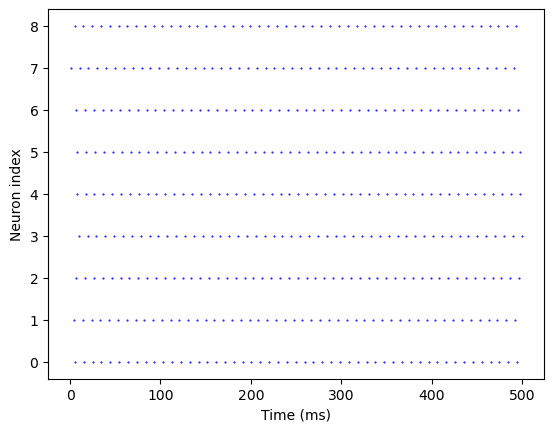

In [218]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=1)
xlabel('Time (ms)')
ylabel('Neuron index')
show()

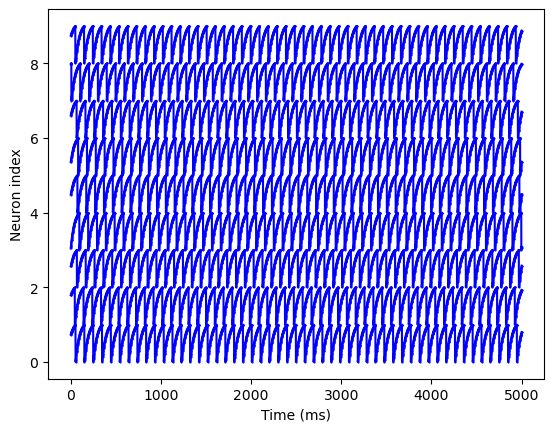

In [219]:
for x in range(n):
	plot(range(len(M1.v[x])), M1.v[x]+x, color='blue', marker='.', markersize=1);
xlabel('Time (ms)')
ylabel('Neuron index')
show()

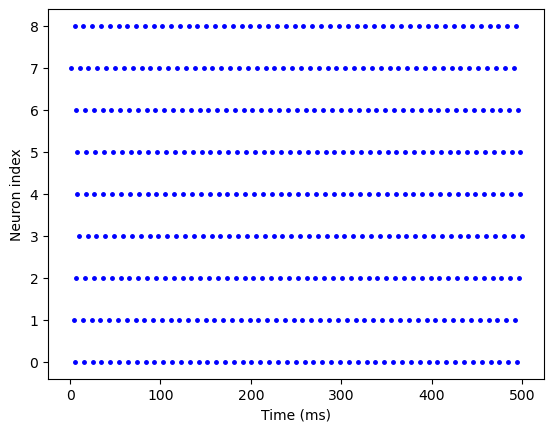

In [220]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
show()

In [221]:
Sp1.spike_trains()[4]

array([  7.4,  17.2,  27. ,  36.8,  46.6,  56.4,  66.2,  76. ,  85.8,
        95.6, 105.4, 115.2, 125. , 134.8, 144.6, 154.4, 164.2, 174. ,
       183.8, 193.6, 203.4, 213.2, 223. , 232.8, 242.6, 252.4, 262.2,
       272. , 281.8, 291.6, 301.4, 311.2, 321. , 330.8, 340.6, 350.4,
       360.2, 370. , 379.8, 389.6, 399.4, 409.2, 419. , 428.8, 438.6,
       448.4, 458.2, 468. , 477.8, 487.6, 497.4]) * msecond

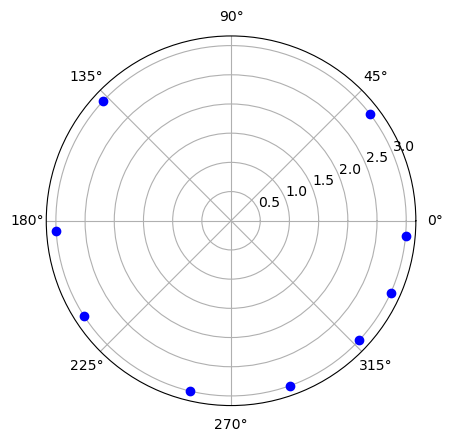

In [222]:
t = 4020
for x in range(n):
	polar(M1.v[x][t] * 2*pi, 3, 'bo')